###     Car Price Predict 

In [2]:
#   import Libraries

import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.svm import SVC
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, BaggingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBRegressor
from sklearn.metrics import r2_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split,cross_val_score
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

####  First, we will read the data and make the necessary analyzes for it

In [3]:
#   raed data 
df = pd.read_csv('CAR DETAILS FROM CAR DEKHO.csv')
df

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner
...,...,...,...,...,...,...,...,...
4335,Hyundai i20 Magna 1.4 CRDi (Diesel),2014,409999,80000,Diesel,Individual,Manual,Second Owner
4336,Hyundai i20 Magna 1.4 CRDi,2014,409999,80000,Diesel,Individual,Manual,Second Owner
4337,Maruti 800 AC BSIII,2009,110000,83000,Petrol,Individual,Manual,Second Owner
4338,Hyundai Creta 1.6 CRDi SX Option,2016,865000,90000,Diesel,Individual,Manual,First Owner


In [4]:
# Find empty values
df.isnull().sum()

name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
dtype: int64

In [5]:
# data information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           4340 non-null   object
 1   year           4340 non-null   int64 
 2   selling_price  4340 non-null   int64 
 3   km_driven      4340 non-null   int64 
 4   fuel           4340 non-null   object
 5   seller_type    4340 non-null   object
 6   transmission   4340 non-null   object
 7   owner          4340 non-null   object
dtypes: int64(3), object(5)
memory usage: 271.4+ KB


In [5]:
# data information
df.describe()

,year,selling_price,km_driven
count,4340.000000,4.340000e+03,4340.000000
mean,2013.090783,5.041273e+05,66215.777419
std,4.215344,5.785487e+05,46644.102194
min,1992.000000,2.000000e+04,1.000000
25%,2011.000000,2.087498e+05,35000.000000
50%,2014.000000,3.500000e+05,60000.000000
75%,2016.000000,6.000000e+05,90000.000000
max,2020.000000,8.900000e+06,806599.000000


### We will now analyze and visualize the data

##### Know the different values  in each column

In [6]:
df.name.value_counts()

Maruti Swift Dzire VDI                     69
Maruti Alto 800 LXI                        59
Maruti Alto LXi                            47
Maruti Alto LX                             35
Hyundai EON Era Plus                       35
                                           ..
Hyundai Verna Transform CRDi VGT SX ABS     1
Maruti S-Presso VXI Plus                    1
Toyota Etios Liva 1.2 VX                    1
Toyota Yaris G                              1
Hyundai i20 Magna 1.4 CRDi                  1
Name: name, Length: 1491, dtype: int64

In [7]:
df.selling_price.value_counts()

300000     162
250000     125
350000     122
550000     107
600000     103
          ... 
2100000      1
828999       1
1119000      1
746000       1
865000       1
Name: selling_price, Length: 445, dtype: int64

In [8]:
df.year.value_counts()

2017    466
2015    421
2012    415
2013    386
2014    367
2018    366
2016    357
2011    271
2010    234
2019    195
2009    193
2008    145
2007    134
2006    110
2005     85
2020     48
2004     42
2003     23
2002     21
2001     20
1998     12
2000     12
1999     10
1997      3
1996      2
1995      1
1992      1
Name: year, dtype: int64

In [9]:
df.transmission.value_counts()

Manual       3892
Automatic     448
Name: transmission, dtype: int64

## We now visualize the data for more clarification

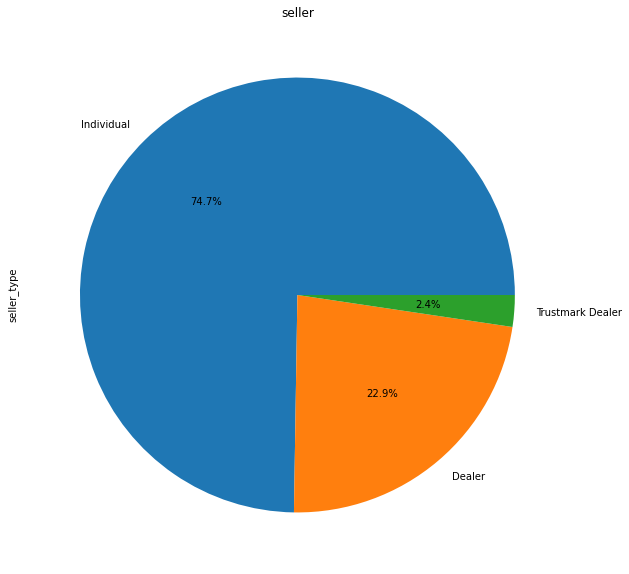

In [23]:
plt.title('seller')
df.seller_type.value_counts().plot(kind='pie',autopct='%1.1f%%',figsize=(10,10))
plt.show()

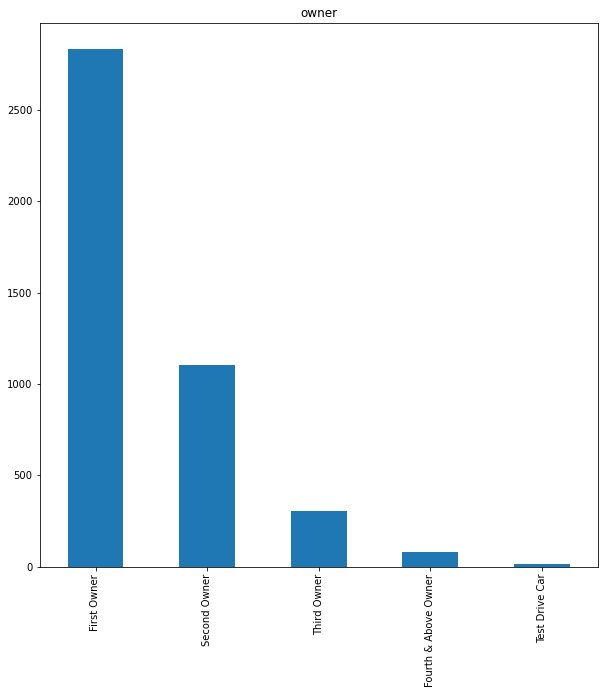

In [25]:
plt.title('owner')
df.owner.value_counts().plot(kind='bar',figsize=(10,10))
plt.show()

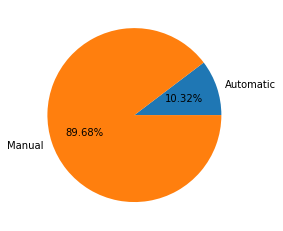

In [9]:
#%matplotlib notebook
Manual = df.loc[df['transmission'] == 'Manual'].count()[0]
Automatic = df.loc[df['transmission'] == 'Automatic'].count()[0]
plt.pie([Automatic, Manual], labels=['Automatic','Manual'], autopct='%.2f%%')
plt.show()

In [10]:
df.fuel.value_counts()

Diesel      2153
Petrol      2123
CNG           40
LPG           23
Electric       1
Name: fuel, dtype: int64

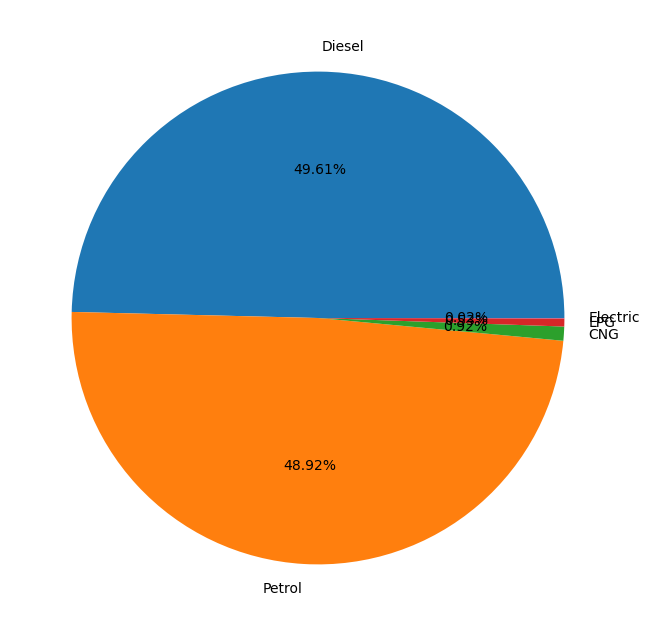

In [36]:
#%matplotlib notebook
plt.figure(figsize=(15,8))
Diesel = df.loc[df['fuel'] == 'Diesel'].count()[0]
Petrol = df.loc[df['fuel'] == 'Petrol'].count()[0]
CNG = df.loc[df['fuel'] == 'CNG'].count()[0]
LPG = df.loc[df['fuel'] == 'LPG'].count()[0]
Electric = df.loc[df['fuel'] == 'Electric'].count()[0]
plt.pie([Diesel, Petrol,CNG,LPG,Electric], labels=['Diesel','Petrol','CNG','LPG','Electric'], autopct='%.2f%%')
plt.show()

In [37]:
df.owner.value_counts()

First Owner             2832
Second Owner            1106
Third Owner              304
Fourth & Above Owner      81
Test Drive Car            17
Name: owner, dtype: int64

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


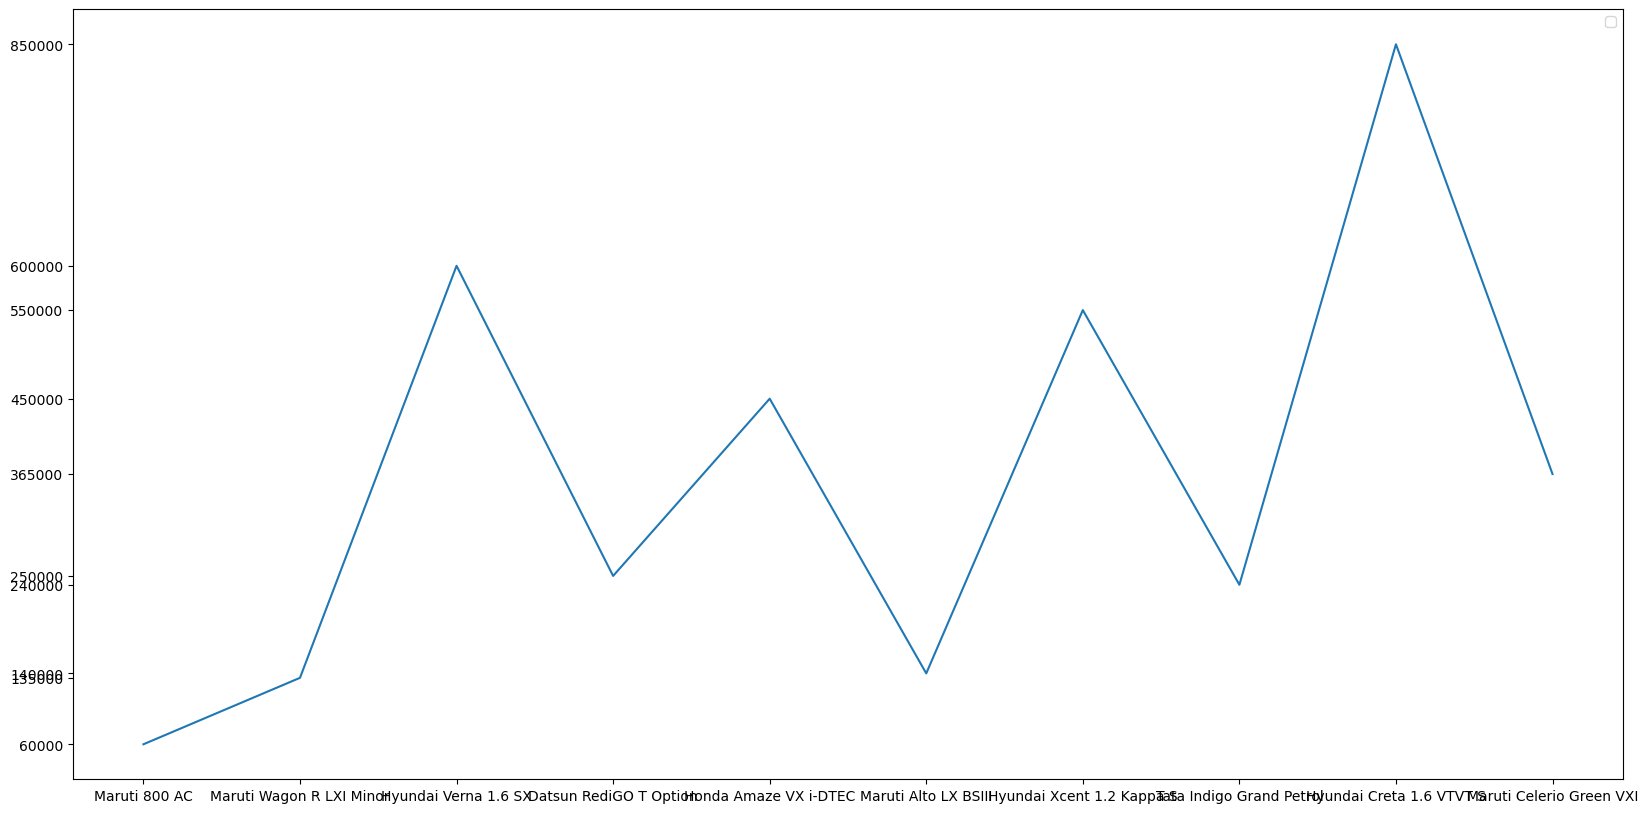

In [38]:
#We take a small sample of the name and price of the car to visualize it
plt.figure(figsize=(20,10))
plt.plot(df.name.head(10) , df.selling_price.head(10))
plt.xticks(df.name.head(10))
plt.yticks(df.selling_price.head(10))
plt.legend()
plt.show()

<Axes: xlabel='transmission', ylabel='count'>

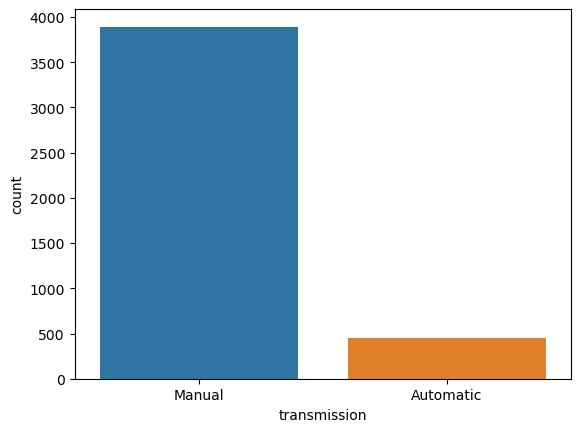

In [39]:
sns.countplot(x='transmission', data=df)

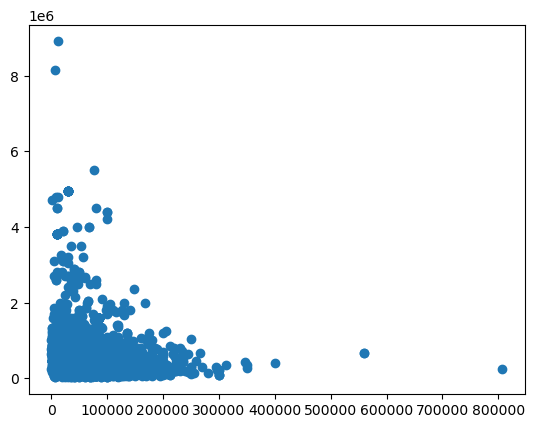

In [40]:
plt.scatter(df.km_driven,df.selling_price)
plt.show()

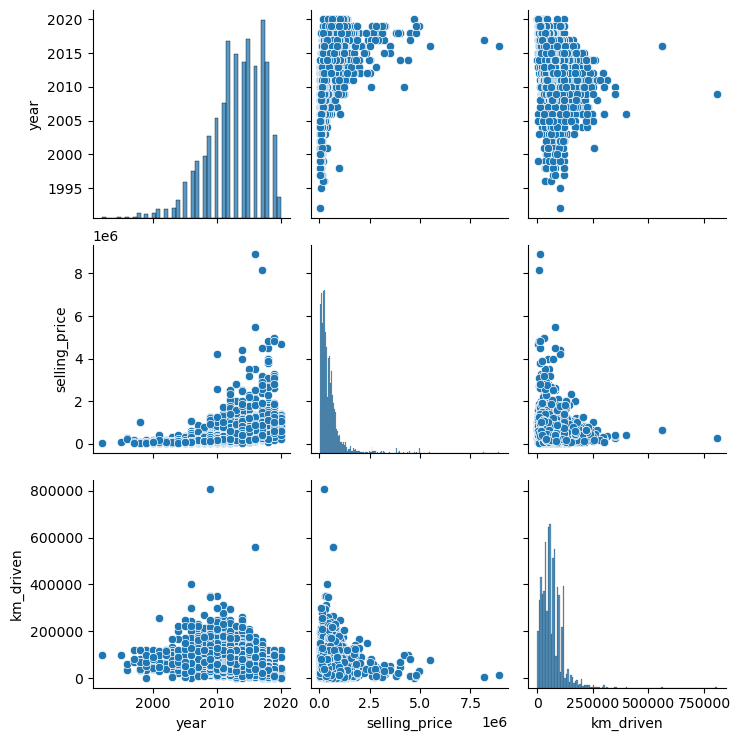

In [41]:
sns.pairplot(df.iloc[:,1:5])

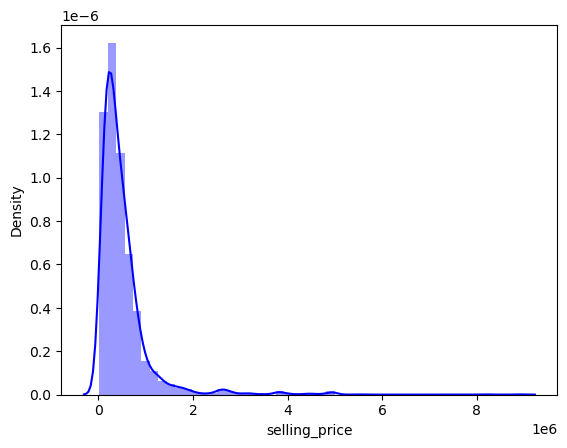

In [42]:
sns.distplot(df['selling_price'], color = 'blue')
plt.show()

#### We prepare the data to train the model on


In [12]:
ef = LabelEncoder()
df.name = ef.fit_transform(df.name)
df.fuel = ef.fit_transform(df.fuel)
df.seller_type = ef.fit_transform(df.seller_type)
df.transmission = ef.fit_transform(df.transmission)
df.owner = ef.fit_transform(df.owner)

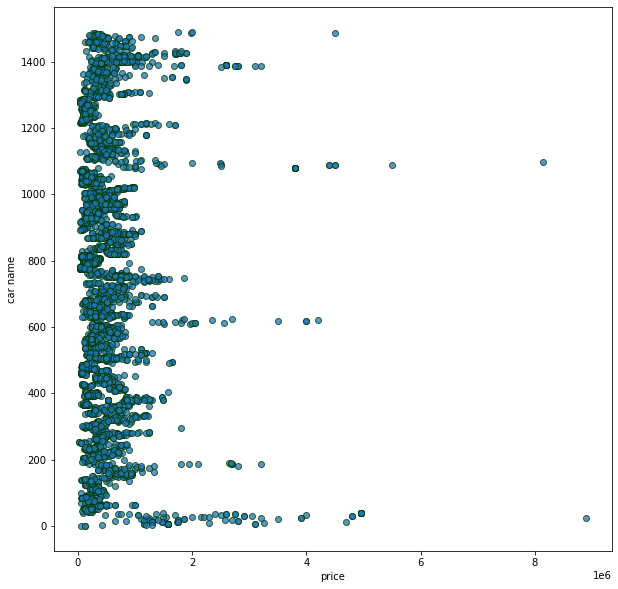

In [18]:
plt.figure(figsize=(10,10))
plt.scatter(df.selling_price,df.name,edgecolors='#003703', alpha=0.75)
plt.xlabel('price')
plt.ylabel('car name')
plt.show()

In [45]:
df

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,775,2007,60000,70000,4,1,1,0
1,1041,2007,135000,50000,4,1,1,0
2,505,2012,600000,100000,1,1,1,0
3,118,2017,250000,46000,4,1,1,0
4,279,2014,450000,141000,1,1,1,2
...,...,...,...,...,...,...,...,...
4335,602,2014,409999,80000,1,1,1,2
4336,601,2014,409999,80000,1,1,1,2
4337,777,2009,110000,83000,4,1,1,2
4338,381,2016,865000,90000,1,1,1,0


In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   name           4340 non-null   int32
 1   year           4340 non-null   int64
 2   selling_price  4340 non-null   int64
 3   km_driven      4340 non-null   int64
 4   fuel           4340 non-null   int32
 5   seller_type    4340 non-null   int32
 6   transmission   4340 non-null   int32
 7   owner          4340 non-null   int32
dtypes: int32(5), int64(3)
memory usage: 186.6 KB


In [48]:
x = df.drop(['selling_price'],axis=1)
y = df['selling_price']

In [79]:
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size = 0.35, random_state=30)

In [80]:
#We create a function that makes it easy for us to train and test any model
def kfolds(model, model_name):
    model = cross_val_score(model, x,y, cv=10)
    model_score = np.average(model)
    print(f"{model_name} score on cross validation: {model_score * 100}%")
def model_train(model,model_name):
    model.fit(X_train,Y_train)
    model_train_score = model.score(X_train, Y_train)
    model_test_score = model.score(X_test, Y_test)
    print(f"{model_name} model score on Train= {model_train_score *100}%\n{model_name} model score on Test= {model_test_score*100}%")

### LinearRegression

In [81]:
model = LinearRegression()
model_train(model,'LinearRegression')
kfolds(model,'LinearRegression')

LinearRegression model score on Train= 45.37148624847466%
LinearRegression model score on Test= 44.27008991016116%
LinearRegression score on cross validation: 42.78007099319474%


### RandomForestRegressor

In [82]:
model_RFR = RandomForestRegressor(n_estimators=100)
model_train(model_RFR,'RandomForestClassifier')
kfolds(model_RFR,'RandomForestClassifier')

RandomForestClassifier model score on Train= 96.32345845250147%
RandomForestClassifier model score on Test= 78.21062787918171%
RandomForestClassifier score on cross validation: 77.88064889685668%


### XGBRegressor

In [83]:
model_XG = XGBRegressor()
model_train(model_XG, "XGBRegressor")
kfolds(model_XG, "XGBRegressor")

XGBRegressor model score on Train= 99.31722685385087%
XGBRegressor model score on Test= 87.25886277458935%
XGBRegressor score on cross validation: 82.54809140231471%


### DecisionTreeRegressor

In [84]:
model_DTR = DecisionTreeRegressor()
model_train(model_RFR,'RandomForestRegressor')
kfolds(model_RFR,'RandomForestRegressor')

RandomForestRegressor model score on Train= 96.08558952047362%
RandomForestRegressor model score on Test= 79.78619013195247%
RandomForestRegressor score on cross validation: 77.53519423969237%


### GradientBoostingRegressor

In [85]:
model_GBR = GradientBoostingRegressor()
model_train(model_RFR,'GradientBoostingRegressor')
kfolds(model_RFR,'GradientBoostingRegressor')

GradientBoostingRegressor model score on Train= 96.5325592815264%
GradientBoostingRegressor model score on Test= 79.99974451728129%
GradientBoostingRegressor score on cross validation: 77.62343794390686%


### BaggingRegressor

In [86]:
model_BR = BaggingRegressor()
model_train(model_RFR,'BaggingRegressor')
kfolds(model_RFR,'BaggingRegressor')

BaggingRegressor model score on Train= 96.14579156082051%
BaggingRegressor model score on Test= 78.3911563574483%
BaggingRegressor score on cross validation: 77.46138837140703%


#### Note that the best result is XGBRegressor